In [1]:
%matplotlib inline

import numpy as np
import power_laws
import matplotlib.colors
import seaborn
import pandas as pd
import rubisco_data

from scipy import stats
from matplotlib import pyplot as plt


In [2]:
# Load the data from Excel, remove data points that are not comparable.
# raw_kin_df is everything in the file, kin_df is the subset with all relevant kinetic data.
raw_kin_df, kin_df = rubisco_data.load_rubisco_data()

# Subset the data in various ways for future use
raw_kin_df, savir_df, nonsavir_df = rubisco_data.filter_data(raw_kin_df)

# Group by RuBisCO form
grouped_form = raw_kin_df.groupby('isoform')

# Markers we use for plotting below.
markers = 'o><^dsphH*'

cnames = ["windows blue", "amber", "greyish brown", "dusty purple", "dusty teal", "dusty red", ]
named_colors = seaborn.xkcd_palette(cnames)

In [3]:
print(raw_kin_df.shape[0], 'total WT RuBisCOs')
print(raw_kin_df.species.unique().size, 'total unique species')
print(kin_df.shape[0], 'RuBisCOs with all core kinetic data measured')

347 total WT RuBisCOs
286 total unique species
200 RuBisCOs with all core kinetic data measured


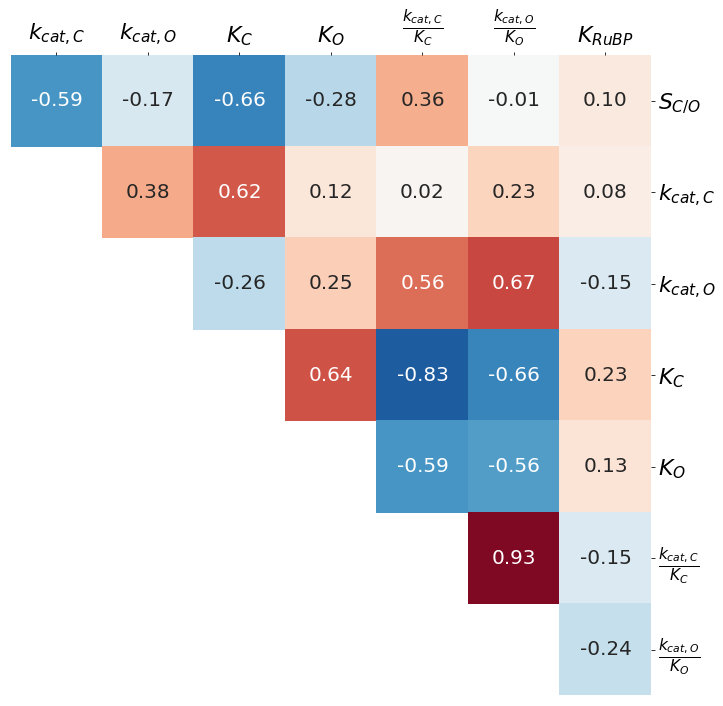

In [4]:
# Summary of correlations among FI Rubiscos
cols = ['S', 'vC', 'vO', 'KC', 'KO', 'kon_C', 'kon_O', 'KRuBP',]
titles = {'S': '$S_{C/O}$', 'vC': '$k_{cat,C}$', 'KC':
          '$K_C$', 'vO': '$k_{cat,O}$', 'KO': '$K_O$',
          'KRuBP': '$K_{RuBP}$',
          'kon_C': '$\\frac{k_{cat,C}}{K_C}$',
          'kon_O': '$\\frac{k_{cat,O}}{K_O}$'}
ticks = [titles[c] for c in cols]

# Can calculate correlation matrix with pandas, but it doesn't give pvals. 
all_FI = raw_kin_df[raw_kin_df.isoform == '1']
corrM = np.log10(all_FI[cols]).corr()
corrM += np.diag([np.NaN] * len(cols))
corrM = np.triu(corrM)
corrM[np.where(corrM == 0)] = np.NaN

        
figure = plt.figure(figsize=(10, 10))

plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

seaborn.heatmap(corrM[:-1,1:], square=True, center=0, 
                cmap="RdBu_r", vmin=-1, vmax=1,
                annot=True, cbar=False, annot_kws={'fontsize': 20}, fmt='.2f')

xax = figure.get_axes()[0]
xax.xaxis.tick_top()
xax.yaxis.tick_right()

tickrange = np.arange(len(cols)-1) + 0.5
plt.xticks(tickrange, ticks[1:], fontsize=22)
plt.yticks(tickrange, ticks[:-1], fontsize=22, rotation='horizontal')
#plt.tick_params(
#    axis='both',       # changes apply to the x-axis
#    which='both',      # both major and minor ticks are affected
#    top=False,         # ticks along the top edge are off
#    right=False)       # ticks along the right edge are off

plt.tight_layout()
plt.savefig('fig3/fig3_FI_all_corr_standalone.svg')
plt.savefig('fig3/fig3_FI_all_corr_standalone.png', dpi=400)

plt.show()